# Wczytywanie

In [29]:
import matplotlib.pyplot as plt
import pandas

def read_pickle(file_path):
    file = pandas.read_pickle(file_path)
    return file

In [30]:
water_level = read_pickle("data/data_imgw/B00020S.pkl")

# Filtracja danych

In [31]:
water_level = water_level[water_level["Station"]=="GŁOGÓW"]
water_level = water_level.dropna()

In [32]:
water_level["Date"]=pandas.to_datetime(water_level["Date"])

In [123]:
water_level["Year"]=water_level["Date"].dt.year
water_level["Month"]=water_level["Date"].dt.month
water_level["Day"]=water_level["Date"].dt.day
def change_coma(value):
    if "," in str(value):
        return str(value).replace(",", ".")
    else:
        return value

# Zastosuj funkcję do kolumny 'nazwa_kolumny'
water_level["B00020S"] = water_level["B00020S"].apply(change_coma)

# Zmień typ danych na float
water_level["B00020S"] = pandas.to_numeric(water_level["B00020S"], errors="coerce")
water_level

,ID,Station,River,Date,Time,B00020S,Year,Month,Day
284375,151160060,GŁOGÓW,Odra,2008-01-01,00:00:00,257.84,2008,1,1
284376,151160060,GŁOGÓW,Odra,2008-01-01,00:10:00,257.31,2008,1,1
284377,151160060,GŁOGÓW,Odra,2008-01-01,00:20:00,257.58,2008,1,1
284378,151160060,GŁOGÓW,Odra,2008-01-01,00:30:00,256.68,2008,1,1
284379,151160060,GŁOGÓW,Odra,2008-01-01,00:40:00,257.31,2008,1,1
...,...,...,...,...,...,...,...,...,...
57346516,151160060,GŁOGÓW,Odra,2023-09-30,23:10:00,205.00,2023,9,30
57346517,151160060,GŁOGÓW,Odra,2023-09-30,23:20:00,205.00,2023,9,30
57346518,151160060,GŁOGÓW,Odra,2023-09-30,23:30:00,205.00,2023,9,30
57346519,151160060,GŁOGÓW,Odra,2023-09-30,23:40:00,205.00,2023,9,30


In [137]:
def df(water_level):
    data_frame = []

    for year in range(2008,2024):
        data_year = water_level[water_level["Year"] == year]
        gruped = data_year.groupby("Month")
        data_year["avg_B00020S"] = gruped["B00020S"].transform("mean")
        data_frame.append(data_year)

    return data_frame

data_frame = df(water_level)
len(data_frame)

C:\Users\justa\AppData\Local\Temp\ipykernel_5648\3654346401.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year["avg_B00020S"] = gruped["B00020S"].transform("mean")
C:\Users\justa\AppData\Local\Temp\ipykernel_5648\3654346401.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year["avg_B00020S"] = gruped["B00020S"].transform("mean")
C:\Users\justa\AppData\Local\Temp\ipykernel_5648\3654346401.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

16

# Wykres

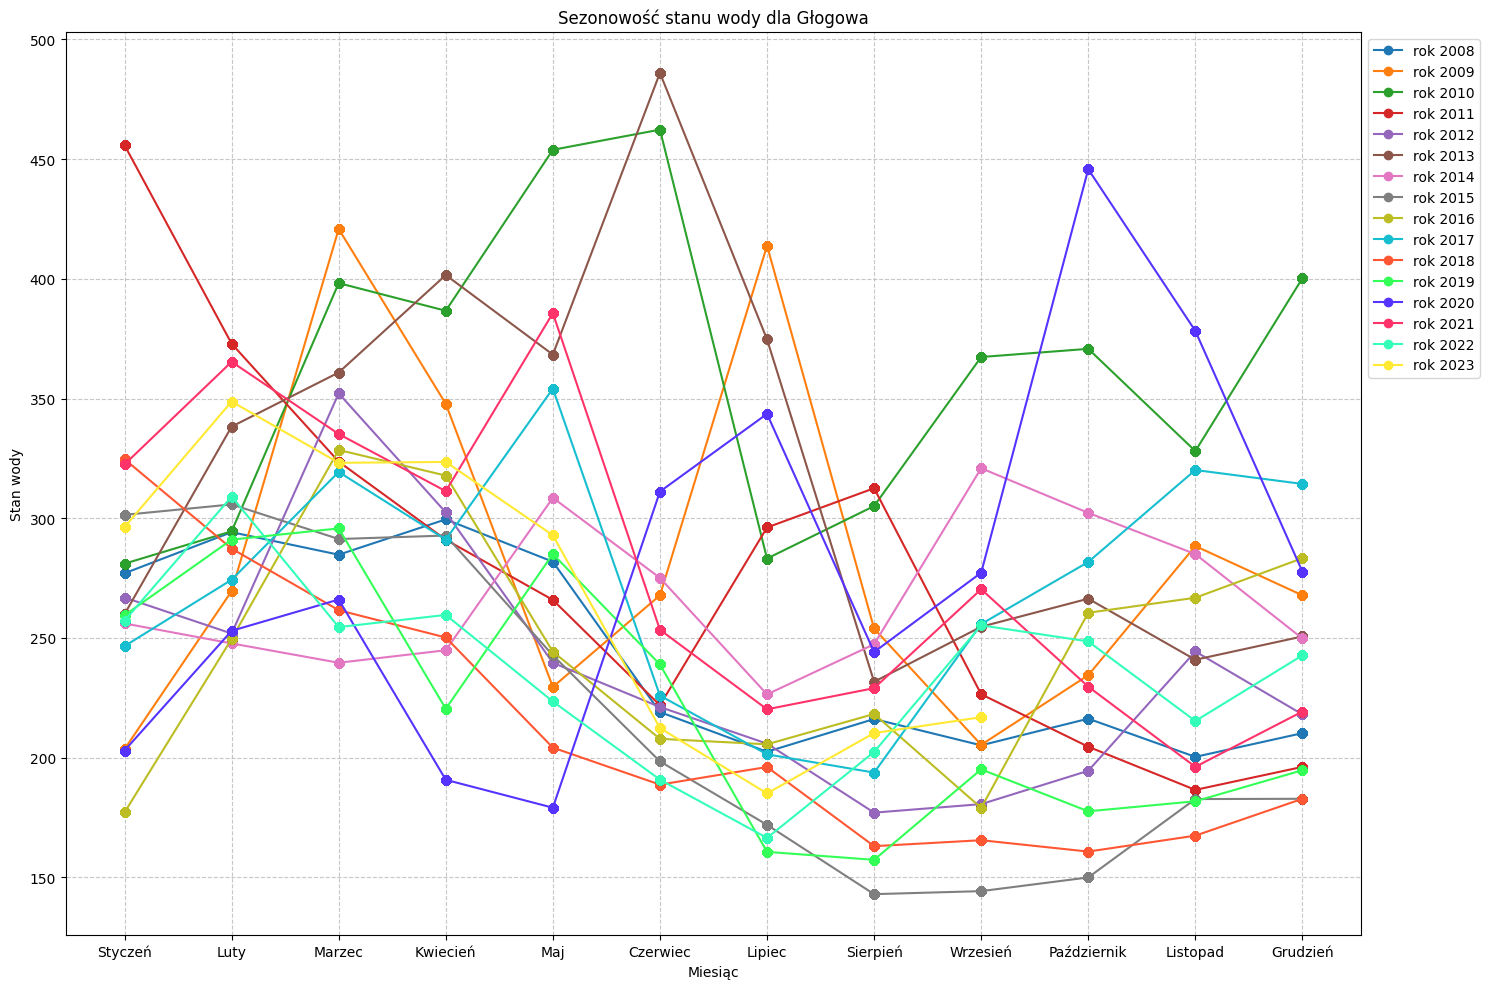

In [143]:
# Tworzenie figury o określonym rozmiarze
plt.figure(figsize=(15, 10))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#FF5733', '#33FF57', '#5733FF', '#FF3369', '#33FFB8', '#FFE933']


# Iteracja przez lata w ramce danych
for i, year in enumerate(range(2008, 2024)):
    df_year = data_frame[year - 2008]
    plt.plot(df_year["Month"], df_year["avg_B00020S"], linestyle='-', marker="o", label=f'rok {year}', color=colors[i])

# Dodanie tytułu i etykiet osi
plt.title('Sezonowość stanu wody dla Głogowa')
plt.xlabel('Miesiąc')
plt.ylabel('Stan wody')

# Dodanie legendy w górnym lewym rogu
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

# Ustawienie etykiet na osi X i dodanie siatki
plt.xticks(range(1,13),["Styczeń", "Luty", "Marzec", "Kwiecień", "Maj", "Czerwiec", "Lipiec", "Sierpień", "Wrzesień", "Październik", "Listopad", "Grudzień"])
plt.grid(linestyle='--', alpha=0.7)

# Automatyczne dostosowanie układu
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

# Wykres dla 5 ostatnich lat

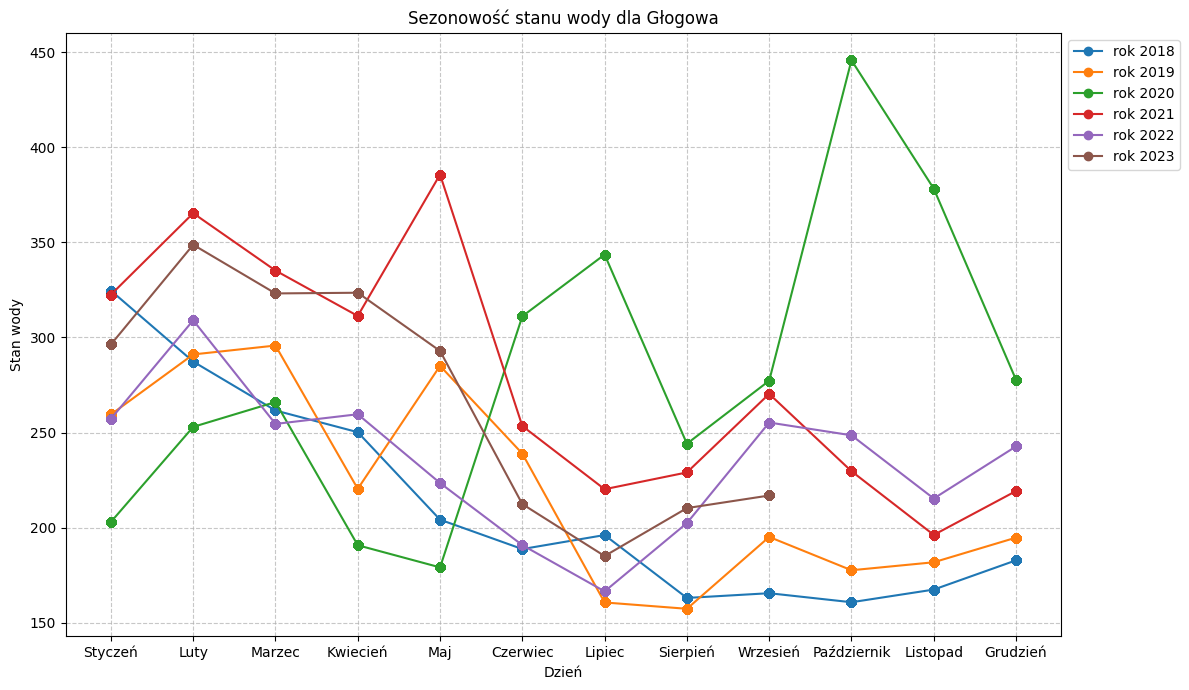

In [140]:
# Tworzenie figury o określonym rozmiarze
plt.figure(figsize=(12, 7))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']


# Iteracja przez lata w ramce danych
for i, year in enumerate(range(2018, 2024)):
    df_year = data_frame[year - 2008]
    plt.plot(df_year["Month"], df_year["avg_B00020S"], linestyle='-', marker="o", label=f'rok {year}', color=colors[i])

# Dodanie tytułu i etykiet osi
plt.title('Sezonowość stanu wody dla Głogowa')
plt.xlabel('Dzień')
plt.ylabel('Stan wody')

# Dodanie legendy w górnym lewym rogu
plt.legend(loc='upper left', bbox_to_anchor=(1,1))

# Ustawienie etykiet na osi X i dodanie siatki
plt.xticks(range(1,13),["Styczeń", "Luty", "Marzec", "Kwiecień", "Maj", "Czerwiec", "Lipiec", "Sierpień", "Wrzesień", "Październik", "Listopad", "Grudzień"])
plt.grid(linestyle='--', alpha=0.7)

# Automatyczne dostosowanie układu
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()